In [5]:
#importing the library
import pandas as pd

import numpy as np


-------------------------- Reading the CSV file -----------------------------

In [8]:
#reading the data
df = pd.read_csv('accident.csv')

df.head()


,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [9]:
df.tail()

df.Types_of_Junction.unique()

array(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other',
       'Unknown', 'T Shape', 'X Shape'], dtype=object)

------------------------- Feature Engineering -------------------------

In [5]:

# Checking the null values.
df.isnull()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12312,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12313,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12314,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64

In [7]:
#  fill the missing value with previous one
df.fillna(method='pad')

#  fill the missing value with next one
df.fillna(method='bfill' , inplace = True)

In [8]:
df.shape

(12316, 15)

In [9]:
df.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

In [11]:
df.describe()

,Accident_severity
count,12316.000000
mean,1.832819
std,0.406082
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


In [12]:

lst = ['Age_band_of_driver' , 'Sex_of_driver' , 'Educational_level' , 'Vehicle_driver_relation' , 'Driving_experience' , 'Lanes_or_Medians' , 'Types_of_Junction' , 'Road_surface_type' , 'Light_conditions' , 'Weather_conditions' , 'Type_of_collision' , 'Vehicle_movement' , 'Pedestrian_movement' , 'Cause_of_accident' , 'Accident_severity']

for col in lst:
    print("Column name : ", col)
    print(df[col].value_counts())
    print("\n\n")



Column name :  Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64



Column name :  Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: Sex_of_driver, dtype: int64



Column name :  Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Unknown                841
Above high school      362
Writing & reading      176
Illiterate              45
Name: Educational_level, dtype: int64



Column name :  Vehicle_driver_relation
Employee    9627
Owner       1973
Unknown      593
Other        123
Name: Vehicle_driver_relation, dtype: int64



Column name :  Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
Unknown        829
No Licence     118
unknown         33
Name: Driving_experience, dtype: int64



Column name :  Lanes_or_Medians
Two-way (divided with broken lines road marki

------------------------------------ Descriptive Analysis ----------------------------------------

In [13]:
import matplotlib.pyplot as plt


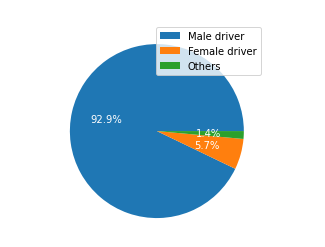

In [14]:
# Out of the total drivers how many are male and female.


Total = df['Sex_of_driver'].count()

male = df[df['Sex_of_driver'] == 'Male']['Sex_of_driver'].count()

female = df[df['Sex_of_driver'] == 'Female']['Sex_of_driver'].count()

others = df[df['Sex_of_driver'] == 'Unknown']['Sex_of_driver'].count()

lst = [(male*100)/Total , (female*100)/Total , (others*100)/Total]

driver_type = ['Male driver' , 'Female driver' , 'Others']

plt.pie(lst , labels = driver_type ,autopct="%.1f%%" , textprops=dict(color="white"))
plt.title("Male drivers and Female drivers" , color = "white")
plt.legend()
plt.show()


# From the below graph we get to know that their are more male drivers as compare to the female drivers

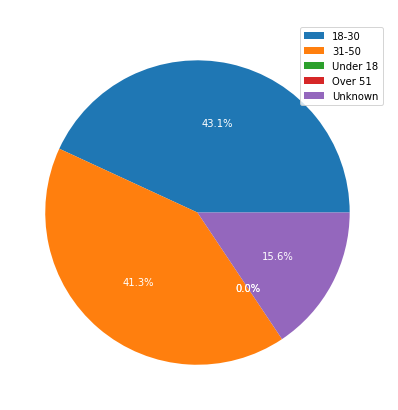

In [15]:

# Checking what are the frequent ages which faces most of the accidents

Total = df['Age_band_of_driver'].count()

a18_30 = df[df['Age_band_of_driver'] == '18-30']['Age_band_of_driver'].count()

a31_50 = df[df['Age_band_of_driver'] == '31-50']['Age_band_of_driver'].count()

Under_18 = df[df['Age_band_of_driver'] == 'Under_18']['Age_band_of_driver'].count()

Over_51 = df[df['Age_band_of_driver'] == 'Over_51']['Age_band_of_driver'].count()

Unknown = df[df['Age_band_of_driver'] == 'Unknown']['Age_band_of_driver'].count()

lst = [(a18_30*100)/Total , (a31_50*100)/Total , ((Under_18)*100)/Total, ((Over_51)*100)/Total , (Unknown*100)/Total]

age_type = ['18-30' , '31-50' , 'Under 18' , 'Over 51' , 'Unknown']

plt.figure(figsize = (14 , 7))

plt.pie(lst , labels = age_type ,autopct="%.1f%%" , textprops=dict(color="white"))
plt.title("Accident Most Frequent Ages" , color = "white")
plt.legend()
plt.show()


# From the below graph we get to know that their are more male drivers as compare to the female drivers

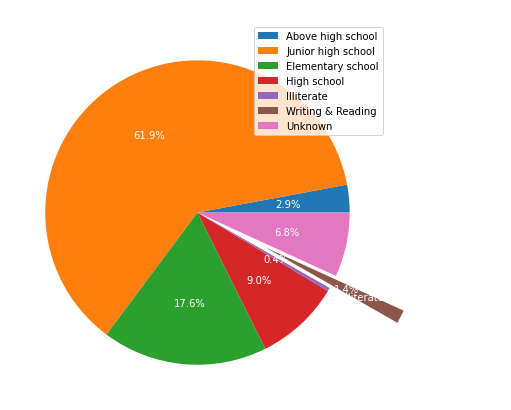

In [16]:
# 'Above high school', 'Junior high school', 'Unknown',
    #    'Elementary school', 'High school', 'Illiterate',
    #    'Writing & reading'



# Checking what are the frequent ages which faces most of the accidents

Total = df['Educational_level'].count()

Above_high_school = df[df['Educational_level'] == 'Above high school']['Educational_level'].count()

Junior_high_school = df[df['Educational_level'] == 'Junior high school']['Educational_level'].count()

Elementary_school = df[df['Educational_level'] == 'Elementary school']['Educational_level'].count()

High_school = df[df['Educational_level'] == 'High school']['Educational_level'].count()

Illiterate = df[df['Educational_level'] == 'Illiterate']['Educational_level'].count()

Writing_reading = df[df['Educational_level'] == 'Writing & reading']['Educational_level'].count()

Unknown = df[df['Educational_level'] == 'Unknown']['Educational_level'].count()


lst = [(Above_high_school*100)/Total , (Junior_high_school*100)/Total , (Elementary_school *100)/Total, (High_school*100)/Total , (Illiterate*100)/Total , (Writing_reading*100)/Total , (Unknown*100)/Total]

Qualification_type = ['Above high school' , 'Junior high school' , 'Elementary school' , 'High school' , 'Illiterate' , 'Writing & Reading' , 'Unknown']

myexplode = [0 , 0 , 0 , 0 , 0 , 0.5 , 0]

plt.figure(figsize = (17 , 7))

plt.pie(lst , labels = Qualification_type ,autopct="%.1f%%" , textprops=dict(color="white") , explode=myexplode)
plt.title("Accidental Person Qualifications" , color = "white")
plt.legend()
plt.show()


# From the below graph we get to know that their are more male drivers as compare to the female drivers
    

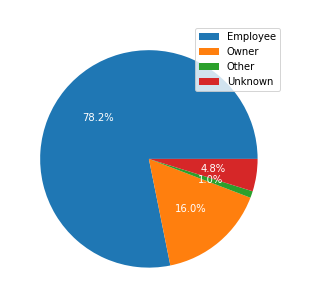

In [17]:
df.Vehicle_driver_relation.unique()


Total = df['Vehicle_driver_relation'].count()

Employee = df[df['Vehicle_driver_relation'] == 'Employee']['Vehicle_driver_relation'].count()

Owner = df[df['Vehicle_driver_relation'] == 'Owner']['Vehicle_driver_relation'].count()

Other = df[df['Vehicle_driver_relation'] == 'Other']['Vehicle_driver_relation'].count()

Unknown = df[df['Vehicle_driver_relation'] == 'Unknown']['Vehicle_driver_relation'].count()


lst = [(Employee*100)/Total , (Owner*100)/Total , (Other*100)/Total, (Unknown*100)/Total]

driver_type = ['Employee' , 'Owner' , 'Other' , 'Unknown']

plt.figure(figsize = (10 , 5))

plt.pie(lst , labels = driver_type ,autopct="%.1f%%" , textprops=dict(color="white"))
plt.title("Vehicle driver relation" , color = "white")
plt.legend()
plt.show()



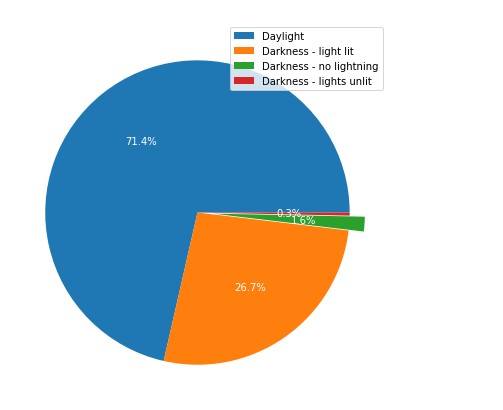

In [18]:
df.Light_conditions.unique()



Total = df['Light_conditions'].count()

DayLight = df[df['Light_conditions'] == 'Daylight']['Light_conditions'].count()

Darkness_lights_lit = df[df['Light_conditions'] == 'Darkness - lights lit']['Light_conditions'].count()

Darkness_no_lighting = df[df['Light_conditions'] == 'Darkness - no lighting']['Light_conditions'].count()

Darkness_lights_unlit = df[df['Light_conditions'] == 'Darkness - lights unlit']['Light_conditions'].count()


lst = [(DayLight*100)/Total , (Darkness_lights_lit*100)/Total , (Darkness_no_lighting*100)/Total, (Darkness_lights_unlit*100)/Total]

light_type = ['Daylight' , 'Darkness - light lit' , 'Darkness - no lightning' , 'Darkness - lights unlit']

exploder = [0 , 0, 0.1 , 0]

plt.figure(figsize = (14 , 7))

plt.pie(lst , labels = light_type ,autopct="%.1f%%" , textprops=dict(color="white") , explode=exploder)
plt.title("Light Conditions While Accident" , color = "white")
plt.legend()
plt.show()



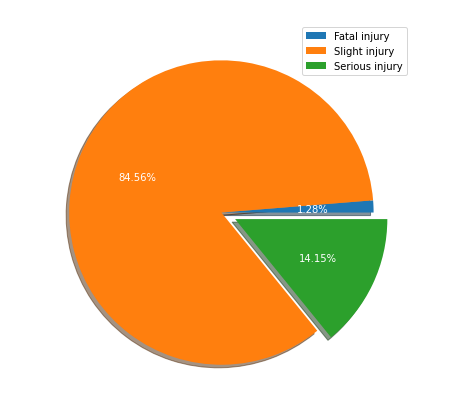

In [19]:
plt.figure(figsize = (14 , 7))

Total = df['Accident_severity'].count()

fatal_injury = df[df['Accident_severity'] == 0]['Light_conditions'].count()

slight_injury = df[df['Accident_severity'] == 2]['Accident_severity'].count()

serious_injury = df[df['Accident_severity'] == 1]['Accident_severity'].count()


lst = [(fatal_injury*100)/Total , (slight_injury*100)/Total , (serious_injury*100)/Total]


injury_type = ['Fatal injury' , 'Slight injury' , 'Serious injury']

exploder = [0 , 0 , 0.1]

plt.pie(lst , labels = injury_type , autopct='%1.2f%%' , shadow=True , textprops=dict(color="white") , explode=exploder)
plt.title("Composition of Accident Severity" , color = "white")
plt.legend()
plt.show()




In [20]:
df.Sex_of_driver.value_counts()

Male       11437
Female       701
Unknown      178
Name: Sex_of_driver, dtype: int64

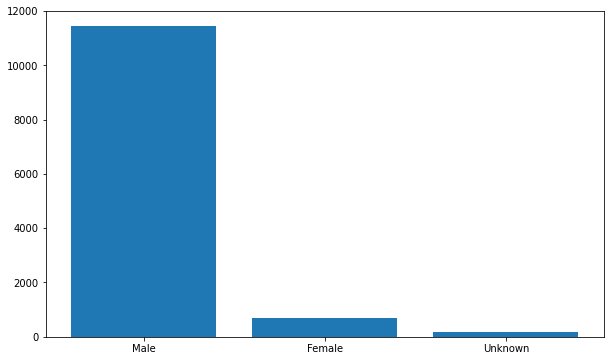

In [21]:
x = ['Male' , 'Female' , 'Unknown']
y = [11437 , 701 , 178]

plt_1 = plt.figure(figsize= (10,6))

plt.bar(x , y)
plt.show()

<AxesSubplot:xlabel='Driving_experience', ylabel='count'>

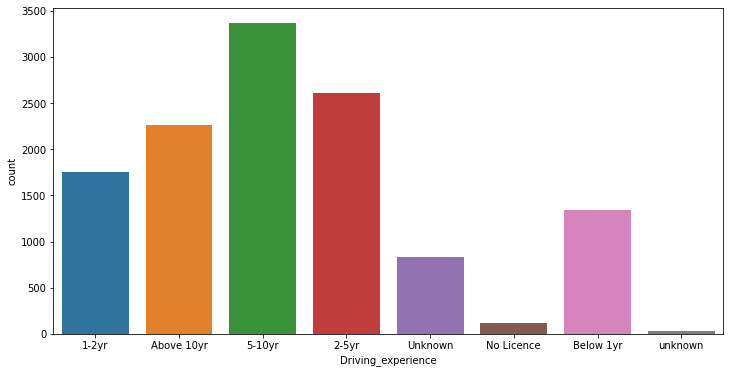

In [22]:
import seaborn as sns

plt_1 = plt.figure(figsize= (12,6))
sns.countplot(x = df['Driving_experience'] )


<AxesSubplot:xlabel='Educational_level', ylabel='count'>

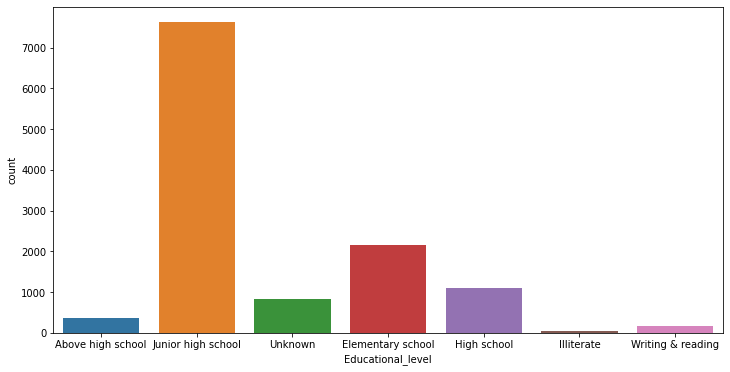

In [23]:
plt_1 = plt.figure(figsize= (12,6))
sns.countplot(x = df['Educational_level'] )

<AxesSubplot:xlabel='Weather_conditions', ylabel='count'>

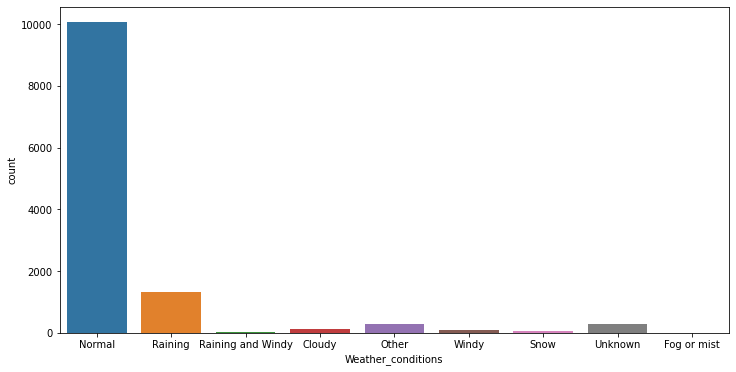

In [24]:
plt_1 = plt.figure(figsize= (12,6))
sns.countplot(x = df['Weather_conditions'] )

<AxesSubplot:xlabel='Road_surface_type', ylabel='count'>

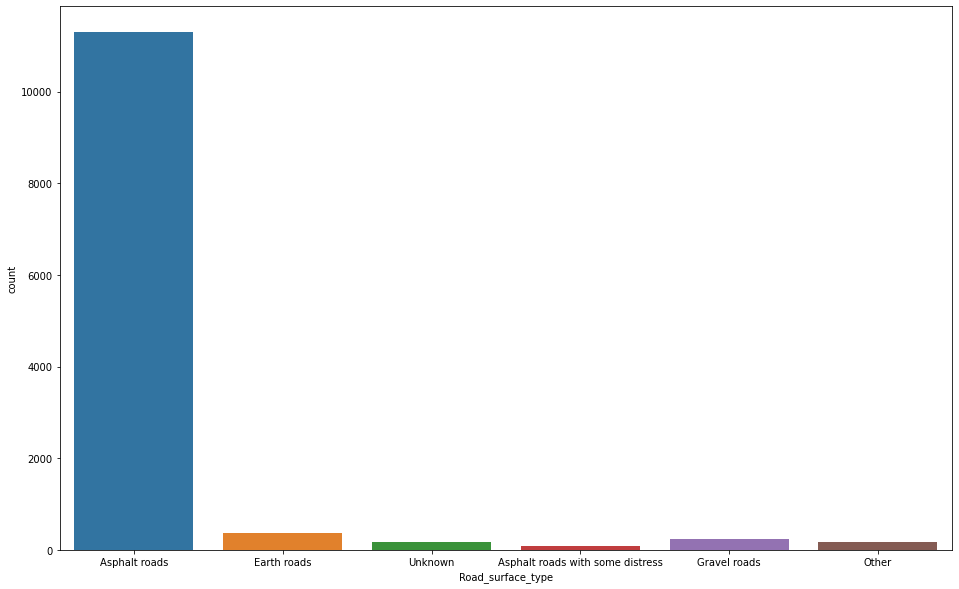

In [25]:
plt_1 = plt.figure(figsize= (16,10))
sns.countplot(x = df['Road_surface_type'] )

<AxesSubplot:xlabel='Age_band_of_driver', ylabel='Count'>

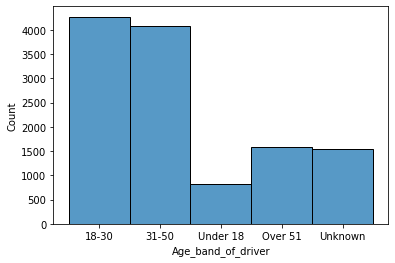

In [26]:
sns.histplot(df['Age_band_of_driver'])

In [27]:
df.Age_band_of_driver.value_counts()

18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: Age_band_of_driver, dtype: int64

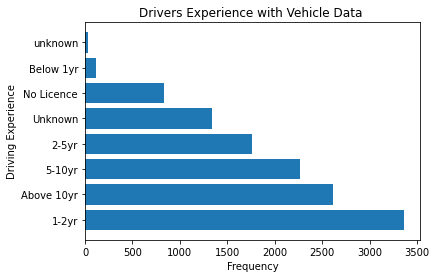

In [28]:
y = df['Driving_experience'].value_counts()
x = ['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'Unknown', 'No Licence',
       'Below 1yr', 'unknown']
plt.title('Drivers Experience with Vehicle Data ')
plt.xlabel('Frequency')
plt.ylabel('Driving Experience')
plt.barh(x, y)
plt.show()

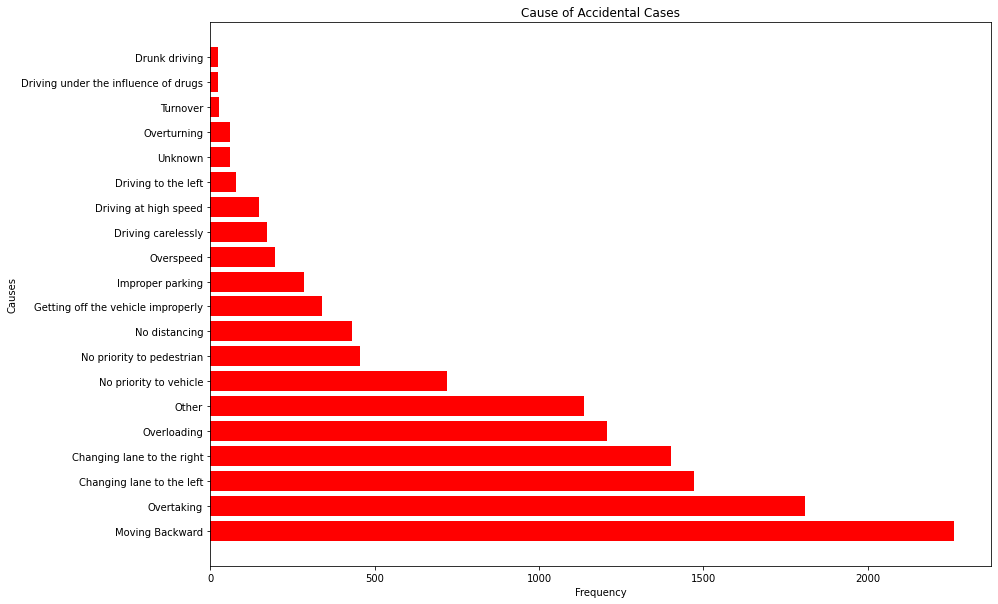

In [29]:
y = df['Cause_of_accident'].value_counts()
x = ['Moving Backward', 'Overtaking', 'Changing lane to the left',
       'Changing lane to the right', 'Overloading', 'Other',
       'No priority to vehicle', 'No priority to pedestrian',
       'No distancing', 'Getting off the vehicle improperly',
       'Improper parking', 'Overspeed', 'Driving carelessly',
       'Driving at high speed', 'Driving to the left', 'Unknown',
       'Overturning', 'Turnover', 'Driving under the influence of drugs',
       'Drunk driving']

plt_1 = plt.figure(figsize= (14,10))

plt.title('Cause of Accidental Cases')
plt.xlabel('Frequency')
plt.ylabel('Causes')
plt.barh(x, y, color='red')
plt.show()

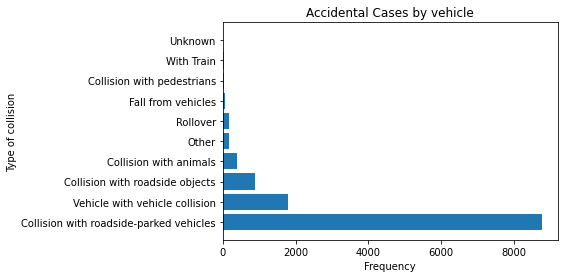

In [30]:
y = df['Type_of_collision'].value_counts()
x = ['Collision with roadside-parked vehicles',
       'Vehicle with vehicle collision',
       'Collision with roadside objects', 'Collision with animals',
       'Other', 'Rollover', 'Fall from vehicles',
       'Collision with pedestrians', 'With Train', 'Unknown']
plt.title('Accidental Cases by vehicle')
plt.xlabel('Frequency')
plt.ylabel('Type of collision')
plt.barh(x, y)
plt.show()

In [31]:
df.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


------------------------------------- Label Encoding ------------------------------------

In [32]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Age_band_of_driver'.
df1 = pd.Series(label_encoder.fit_transform(df['Age_band_of_driver']))

df.iloc[: , 0:1] = df1


In [33]:
# Encode labels in column 'Sex_of_driver'.
df2 = pd.Series(label_encoder.fit_transform(df['Sex_of_driver']))

df.iloc[: , 1:2] = df2

In [34]:
# Encode labels in column 'Educational_level'.
df3 = pd.Series(label_encoder.fit_transform(df['Educational_level']))

df.iloc[: , 2:3] = df3


In [35]:
# Encode labels in column 'Vehicle_driver_relation'.
df4 = pd.Series(label_encoder.fit_transform(df['Vehicle_driver_relation']))

df.iloc[: , 3:4] = df4

In [36]:
# Encode labels in column 'Driving_experience'.
df4 = pd.Series(label_encoder.fit_transform(df['Driving_experience']))

df.iloc[: , 4:5] = df4

In [37]:
# Encode labels in column 'Lanes_or_Medians'.
df5 = pd.Series(label_encoder.fit_transform(df['Lanes_or_Medians']))

df.iloc[: , 5:6] = df5

In [38]:
# Encode labels in column 'Types_of_Junction'.
df6 = pd.Series(label_encoder.fit_transform(df['Types_of_Junction']))

df.iloc[: , 6:7] = df6

In [39]:
# Encode labels in column 'Road_surface_type'.
df7 = pd.Series(label_encoder.fit_transform(df['Road_surface_type']))

df.iloc[: , 7:8] = df7

In [40]:
# Encode labels in column 'Light_conditions'.
df8 = pd.Series(label_encoder.fit_transform(df['Light_conditions']))

df.iloc[: , 8:9] = df8

In [41]:
# Encode labels in column 'Weather_conditions'.
df9 = pd.Series(label_encoder.fit_transform(df['Weather_conditions']))

df.iloc[: , 9:10] = df9

In [42]:
# Encode labels in column 'Type_of_collision'.
df10 = pd.Series(label_encoder.fit_transform(df['Type_of_collision']))

df.iloc[: , 10:11] = df10

In [43]:
# Encode labels in column 'Vehicle_movement'.
df11 = pd.Series(label_encoder.fit_transform(df['Vehicle_movement']))

df.iloc[: , 11:12] = df11

In [44]:
# Encode labels in column 'Pedestrian_movement'.
df12 = pd.Series(label_encoder.fit_transform(df['Pedestrian_movement']))

df.iloc[: , 12:13] = df12

In [45]:
# Encode labels in column 'Cause_of_accident'.
df13 = pd.Series(label_encoder.fit_transform(df['Cause_of_accident']))

df.iloc[: , 13:14] = df13

In [46]:
df.tail()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,1,1,5,0,1,4,1,0,3,2,8,2,5,10,2
12312,4,1,1,0,2,2,1,0,3,2,8,4,5,10,2
12313,2,1,4,0,2,2,1,0,3,2,8,4,5,1,1
12314,0,0,4,0,3,4,1,0,0,2,8,4,5,5,2
12315,0,1,4,0,2,4,2,0,0,2,8,8,1,1,2
